This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [508]:
conda list

# packages in environment at C:\Users\user\anaconda3\envs\DL:
#
# Name                    Version                   Build  Channel
absl-py                   1.2.0                    pypi_0    pypi
anyio                     3.5.0            py37haa95532_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py37h2bbff1b_0  
astor                     0.8.1                    pypi_0    pypi
attrs                     21.4.0             pyhd3eb1b0_0  
babel                     2.9.1              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           py37haa95532_0  
bleach                    4.1.0              pyhd3eb1b0_0  
brotlipy                  0.7.0           py37h2bbff1b_1003  
ca-certificates           2022.07.19           haa95532_0  
certifi                   2022.9.14        py37haa95532_0  
cffi                      1.15.1           py37h2bbff1b_0  
charset-normali

In [509]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14885286329684789778
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10005613773
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14843803954077907793
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [510]:
#Lib/site-packages/tensorflow/python/keras/datasets/imdb.py
#with np.load(path) as f: -> with np.load(path, allow_pickle=True) as f:

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [511]:
#列出第一篇文章的字的編號和長度
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [512]:
len(train_data[0])

218

In [513]:
#正面或負面
train_labels[0]

1

In [514]:
#限制長度
max([max(sequence) for sequence in train_data])

9999

In [515]:
#單字表
a = imdb.get_word_index()

#a['app']: 38479
a['app']

38479

**Decoding reviews back to text**

In [548]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

#reverse索引 a['app']: 38479 -> 38479: a['app']
#reverse_word_index

In [549]:
#過濾字詞
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review 

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [550]:
#取第100~199篇文章
Alist = []
for i in range(100):
    i = i + 100
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, "?") for i in train_data[i]])
    Alist.append([i,decoded_review])
    

In [551]:
#列出文章
for n in range(len(Alist)):
    print(Alist[n],'\n\n')

[100, "? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"] 


[101, '? whoever wrote up ? as a great car movie must be getting paid off by daniel ? to promote this ultra crappy ? steaming pile of amateur crap easily the worst ? movie or any movie ever made this makes ? look like citizen kane br 

In [552]:
#自己猜的答案
my_answer = [0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,
          1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
          1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,
          0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,
          1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0]



In [553]:
print(train_labels[100:200] == my_answer)
sum(train_labels[100:200] == my_answer)

[ True  True  True  True  True  True  True  True  True False  True  True
 False False  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True False  True]


87

In [554]:
#隨機產生的答案
import numpy as np
random_answer = np.random.choice([0,1],size=100)
random_answer

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [555]:
sum(train_labels[100:200] == random_answer)

45

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [556]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [557]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [558]:
len(x_train)
len(x_train[0])

10000

In [559]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [560]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [561]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [562]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [563]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 185us/sample - loss: 0.5486 - acc: 0.7575 - val_loss: 0.4515 - val_acc: 0.8108
Epoch 2/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.3526 - acc: 0.8964 - val_loss: 0.3391 - val_acc: 0.8855
Epoch 3/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.2558 - acc: 0.9277 - val_loss: 0.2981 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 2s 100us/sample - loss: 0.2007 - acc: 0.9409 - val_loss: 0.2874 - val_acc: 0.8864
Epoch 5/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.1599 - acc: 0.9542 - val_loss: 0.2913 - val_acc: 0.8831
Epoch 6/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.1295 - acc: 0.9635 - val_loss: 0.2917 - val_acc: 0.8841
Epoch 7/20
15000/15000 [==============================] - 1s 91us/sample - loss: 0.1132 - acc: 0.9674 - val_los

In [564]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

**Plotting the training and validation loss**

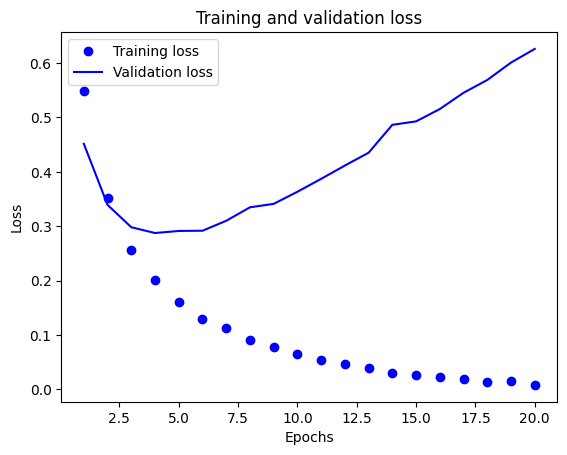

In [565]:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

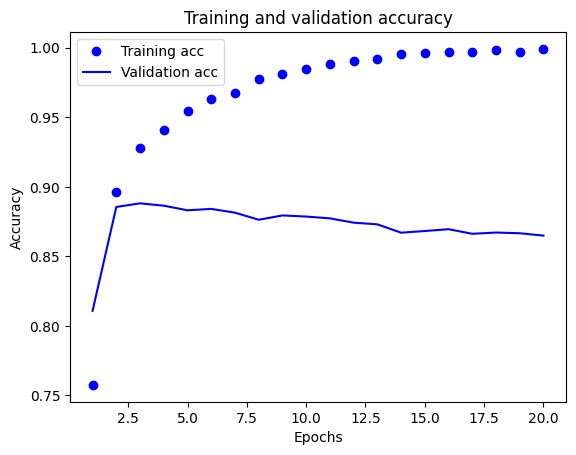

In [566]:
#"accuracy"&"val_accuracy" -> "acc"&"val_acc"
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [567]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 85us/sample - loss: 0.4444 - acc: 0.8223
Epoch 2/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.2581 - acc: 0.9115
Epoch 3/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.2009 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 4s 162us/sample - loss: 0.2918 - acc: 0.8839


In [568]:
results

[0.29184034982681273, 0.88392]

### Using a trained model to generate predictions on new data

In [569]:
model.predict(x_test)

array([[0.16966075],
       [0.9997202 ],
       [0.8318329 ],
       ...,
       [0.11555609],
       [0.05144799],
       [0.48652953]], dtype=float32)

### Further experiments

In [570]:
#修改一些增加batch size
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=1024)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/sample - loss: 0.5667 - acc: 0.7825
Epoch 2/4
25000/25000 [==============================] - 1s 60us/sample - loss: 0.3775 - acc: 0.8850
Epoch 3/4
25000/25000 [==============================] - 1s 60us/sample - loss: 0.2832 - acc: 0.9068
Epoch 4/4
25000/25000 [==============================] - 4s 155us/sample - loss: 0.2864 - acc: 0.8877


In [571]:
results

[0.28642670197486875, 0.88768]

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [572]:

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [573]:
len(train_data)

8982

In [574]:
len(test_data)

2246

In [575]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [576]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [577]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [578]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [579]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [580]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [581]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [582]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [583]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [584]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 199us/sample - loss: 2.8690 - acc: 0.4665 - val_loss: 1.8726 - val_acc: 0.6540
Epoch 2/20
7982/7982 [==============================] - 1s 81us/sample - loss: 1.4904 - acc: 0.7130 - val_loss: 1.3387 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 75us/sample - loss: 1.0752 - acc: 0.7821 - val_loss: 1.1425 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.8492 - acc: 0.8202 - val_loss: 1.0713 - val_acc: 0.7680
Epoch 5/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.6855 - acc: 0.8567 - val_loss: 0.9694 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 72us/sample - loss: 0.5521 - acc: 0.8839 - val_loss: 0.9281 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.4495 - acc: 0.9027 - val_loss: 0.9066 - val_acc:

**Plotting the training and validation loss**

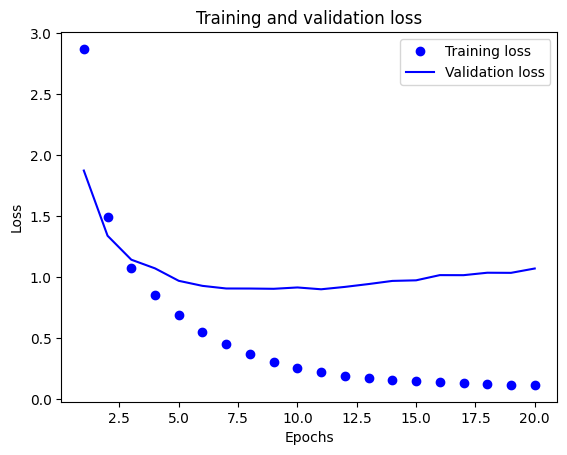

In [585]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

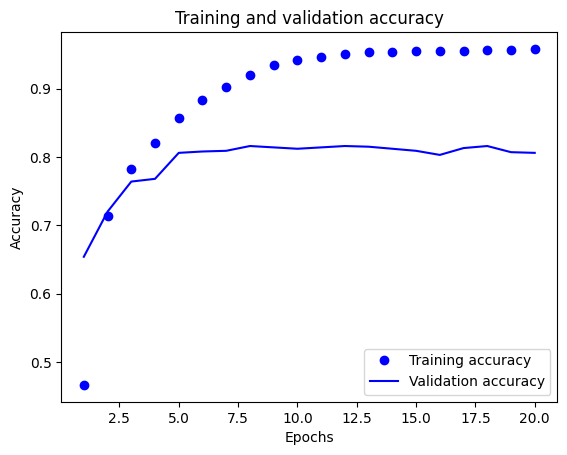

In [586]:
plt.clf()
acc = history.history["acc"]
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [587]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
8982/8982 [==============================] - 1s 123us/sample - loss: 2.4199 - acc: 0.5553
Epoch 2/9
8982/8982 [==============================] - 1s 68us/sample - loss: 1.2848 - acc: 0.7267
Epoch 3/9
8982/8982 [==============================] - 1s 67us/sample - loss: 0.9675 - acc: 0.7916
Epoch 4/9
8982/8982 [==============================] - 1s 66us/sample - loss: 0.7587 - acc: 0.8386
Epoch 5/9
8982/8982 [==============================] - 1s 69us/sample - loss: 0.6013 - acc: 0.8747
Epoch 6/9
8982/8982 [==============================] - 1s 68us/sample - loss: 0.4819 - acc: 0.9000
Epoch 7/9
8982/8982 [==============================] - 1s 67us/sample - loss: 0.3867 - acc: 0.9178
Epoch 8/9
8982/8982 [==============================] - 1s 71us/sample - loss: 0.3207 - acc: 0.9316
Epoch 9/9
2246/2246 [==============================] - 1s 366us/sample - loss: 0.9537 - acc: 0.7943


In [588]:
results

[0.9536699269991948, 0.794301]

In [589]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19100623330365094

### Generating predictions on new data

In [590]:
predictions = model.predict(x_test)

In [591]:
predictions[0].shape

(46,)

In [592]:
np.sum(predictions[0])

0.99999976

In [593]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [594]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [595]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [596]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 240us/sample - loss: 2.7323 - acc: 0.4533 - val_loss: 1.9863 - val_acc: 0.6010
Epoch 2/20
7982/7982 [==============================] - 1s 98us/sample - loss: 1.6751 - acc: 0.6229 - val_loss: 1.5939 - val_acc: 0.6160
Epoch 3/20
7982/7982 [==============================] - 1s 92us/sample - loss: 1.3625 - acc: 0.6427 - val_loss: 1.4715 - val_acc: 0.6340
Epoch 4/20
7982/7982 [==============================] - 1s 96us/sample - loss: 1.2038 - acc: 0.6716 - val_loss: 1.3965 - val_acc: 0.6590
Epoch 5/20
7982/7982 [==============================] - 1s 100us/sample - loss: 1.0851 - acc: 0.7020 - val_loss: 1.4036 - val_acc: 0.6750
Epoch 6/20
7982/7982 [==============================] - 1s 91us/sample - loss: 0.9810 - acc: 0.7373 - val_loss: 1.4026 - val_acc: 0.6810
Epoch 7/20
7982/7982 [==============================] - 1s 92us/sample - loss: 0.8912 - acc: 0.7626 - val_loss: 1.3855 - val_acc

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [597]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [598]:
train_data.shape

(404, 13)

In [599]:
test_data.shape

(102, 13)

In [600]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [601]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [602]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [603]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [604]:
all_scores

[1.9748722, 2.4865928, 2.4756703, 2.4063497]

In [605]:
np.mean(all_scores)

2.3358712

**Saving the validation logs at each fold**

In [606]:
#把 history.history["val_mae"] ->  history.history["val_mean_absolute_error"]
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [607]:
print(all_mae_histories)
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

[[18.960749, 15.267867, 10.592019, 6.7331386, 5.095595, 4.2191935, 3.6648538, 3.3265648, 3.139289, 2.964738, 2.8664098, 2.8327432, 2.6583765, 2.5926657, 2.5919678, 2.4530246, 2.405354, 2.3695025, 2.4466076, 2.37773, 2.4870522, 2.359183, 2.363707, 2.2276554, 2.2304132, 2.142363, 2.1245131, 2.2147357, 2.139465, 2.0594764, 2.2606423, 2.084131, 2.0576036, 2.1822891, 2.1146967, 2.0913608, 2.3021045, 2.2076104, 2.0845482, 2.0723503, 2.2549036, 2.117873, 1.970836, 2.005084, 2.066233, 2.013065, 2.0543506, 2.1678019, 1.9821069, 1.9111685, 1.9815904, 2.04463, 2.1667516, 1.9306272, 1.953062, 2.2032192, 1.8614122, 1.9559987, 1.9330703, 1.9857805, 2.021632, 1.866284, 2.0400643, 1.8732797, 1.905939, 1.9147953, 2.0070078, 1.918613, 1.9954343, 1.9530917, 1.924582, 1.9349434, 1.9313788, 1.9169091, 2.005514, 1.9823941, 1.9528826, 1.8747873, 2.1810443, 1.8187453, 1.9362407, 1.86528, 1.9844415, 1.9092236, 1.8739208, 1.8618333, 1.9537646, 1.8658363, 1.9370167, 1.9055074, 1.9733601, 1.8616083, 1.8325635, 1.

**Plotting validation scores**

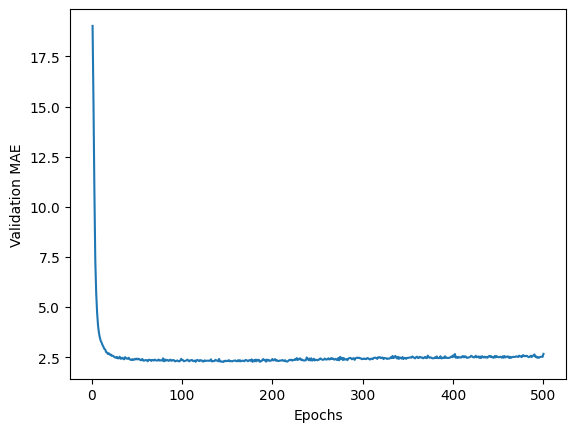

In [608]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

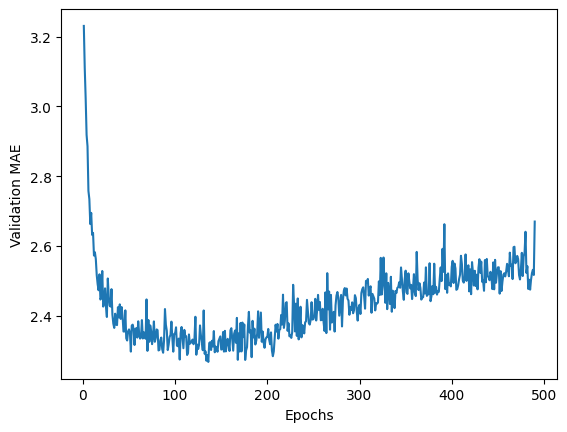

In [609]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [610]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 5ms/sample - loss: 16.9704 - mean_absolute_error: 2.7060


In [611]:
test_mae_score

2.706011

### Generating predictions on new data

In [612]:
predictions = model.predict(test_data)
predictions[0]

array([9.089033], dtype=float32)

### Wrapping up

## Summary

In [613]:
#TypeError: Descriptors cannot not be created directly.
#install protoc >= 3.19.0.
#conda install protobuf==3.20.*

In [614]:
#ValueError: Object arrays cannot be loaded when allow_pickle=False

In [615]:
conda list

# packages in environment at C:\Users\user\anaconda3\envs\DL:
#
# Name                    Version                   Build  Channel
absl-py                   1.2.0                    pypi_0    pypi
anyio                     3.5.0            py37haa95532_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py37h2bbff1b_0  
astor                     0.8.1                    pypi_0    pypi
attrs                     21.4.0             pyhd3eb1b0_0  
babel                     2.9.1              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           py37haa95532_0  
bleach                    4.1.0              pyhd3eb1b0_0  
brotlipy                  0.7.0           py37h2bbff1b_1003  
ca-certificates           2022.07.19           haa95532_0  
certifi                   2022.9.14        py37haa95532_0  
cffi                      1.15.1           py37h2bbff1b_0  
charset-normali

In [616]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5562830539849384572
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10005613773
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10558842541703111442
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
